<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-and-pre-processing" data-toc-modified-id="EDA-and-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA and pre-processing</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-(data-shape,-balance,-etc)" data-toc-modified-id="Descriptive-statistics-(data-shape,-balance,-etc)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descriptive statistics (data shape, balance, etc)</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data pre-processing</a></span></li></ul></li><li><span><a href="#ML-template-starts---training-session" data-toc-modified-id="ML-template-starts---training-session-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ML template starts - training session</a></span><ul class="toc-item"><li><span><a href="#Training-model-(LGBM)-with-stratisfied-CV" data-toc-modified-id="Training-model-(LGBM)-with-stratisfied-CV-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Training model (LGBM) with stratisfied CV</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model evaluation</a></span><ul class="toc-item"><li><span><a href="#Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class" data-toc-modified-id="Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot of the CV folds - F1 macro and F1 for the positive class</a></span></li><li><span><a href="#Scikit-learn---Classification-report" data-toc-modified-id="Scikit-learn---Classification-report-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scikit learn - Classification report</a></span></li><li><span><a href="#ROC-curve-with-AUC" data-toc-modified-id="ROC-curve-with-AUC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ROC curve with AUC</a></span></li><li><span><a href="#Confusion-Matrix-plot-(normalized-and-with-absolute-values)" data-toc-modified-id="Confusion-Matrix-plot-(normalized-and-with-absolute-values)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Confusion Matrix plot (normalized and with absolute values)</a></span></li><li><span><a href="#Feature-Importance-plot" data-toc-modified-id="Feature-Importance-plot-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature Importance plot</a></span></li><li><span><a href="#Correlations-analysis-(on-top-features)" data-toc-modified-id="Correlations-analysis-(on-top-features)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Correlations analysis (on top features)</a></span></li><li><span><a href="#Anomaly-detection-on-the-training-set-(on-top-features-alone)" data-toc-modified-id="Anomaly-detection-on-the-training-set-(on-top-features-alone)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Anomaly detection on the training set (on top features alone)</a></span></li><li><span><a href="#Data-leakage-test" data-toc-modified-id="Data-leakage-test-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Data leakage test</a></span></li>
<li><span><a href="##-Analysis-of-FPs/FNs" data-toc-modified-id="##-Analysis-of-FPs/FNs"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Analysis of FPs/FNs</a></span></li></ul></li></ul></div>

In [1]:
import warnings
import pandas as pd 
import numpy as np
from pandas_summary import DataFrameSummary
import octopus_ml as oc 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
%matplotlib inline
warnings.simplefilter("ignore")

### Read the Kaggle Titanic competition dataset 
https://www.kaggle.com/c/titanic

In [2]:
XY_df=pd.read_csv('../datasets/Kaggle_titanic_train.csv')

# EDA and pre-processing 

## Descriptive statistics (data shape, balance, etc)

In [3]:
XY_df.shape

(891, 12)

In [4]:
XY_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target distribution

In [5]:
XY_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

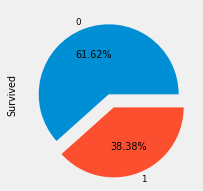

In [6]:
oc.target_pie(XY_df,'Survived')

### Selected features vs target historgrams 

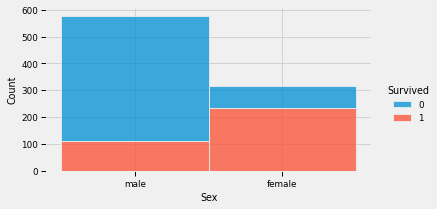

In [7]:
oc.hist_target(XY_df, 'Sex', 'Survived')

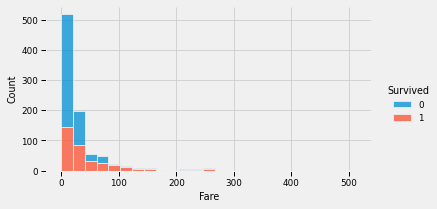

In [8]:
oc.hist_target(XY_df, 'Fare', 'Survived')

### Data summary - and missing values analysis

In [9]:
import missingno as msno
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(XY_df)
dfs.summary()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,NaN,NaN,714,891,891,NaN,891,NaN,NaN
mean,446,0.383838,2.30864,NaN,NaN,29.6991,0.523008,0.381594,NaN,32.2042,NaN,NaN
std,257.354,0.486592,0.836071,NaN,NaN,14.5265,1.10274,0.806057,NaN,49.6934,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,223.5,0,2,NaN,NaN,20.125,0,0,NaN,7.9104,NaN,NaN
50%,446,0,3,NaN,NaN,28,0,0,NaN,14.4542,NaN,NaN
75%,668.5,1,3,NaN,NaN,38,1,0,NaN,31,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [10]:
# Top 5 sparse features, mainly labs results 
pd.Series(1 - XY_df.count() / len(XY_df)).sort_values(ascending=False).head(5)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Fare        0.000000
Ticket      0.000000
dtype: float64

## Data pre-processing 

In [11]:
XY_df['Cabin'] = XY_df['Cabin'].astype('str').fillna("U0")
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
XY_df['Deck'] = XY_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
XY_df['Deck'] = XY_df['Deck'].map(deck)
XY_df['Deck'] = XY_df['Deck'].fillna(0)
XY_df['Deck'] = XY_df['Deck'].astype('category')

XY_df['relatives'] = XY_df['SibSp'] + XY_df['Parch']
XY_df.loc[XY_df['relatives'] > 0, 'not_alone'] = 0
XY_df.loc[XY_df['relatives'] == 0, 'not_alone'] = 1
XY_df['not_alone'] = XY_df['not_alone'].astype(int)

def encodeAgeFare(train):
    train.loc[train['Age'] <= 16, 'Age_fare'] = 0
    train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_fare'] = 1
    train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_fare'] = 2
    train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_fare'] = 3
    train.loc[ (train['Age'] > 48) & (train['Age'] <= 80), 'Age_fare'] = 4
    
    train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
    train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_adj'] = 1
    train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31.0), 'Fare_adj'] = 2
    train.loc[(train['Fare'] > 31.0) & (train['Fare'] <= 512.329), 'Fare_adj'] = 3

encodeAgeFare(XY_df)


In [12]:
# Categorical features pre-proccesing  
cat_list ,XY_df=oc.cat_features_proccessing(XY_df)
print (cat_list)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck']


In [13]:
features=XY_df.columns.to_list()
print ('number of features ', len(features))

features_remove=['PassengerId','Survived']
for f in features_remove:
    features.remove(f)

number of features  17


In [14]:
X=XY_df[features]
y=XY_df['Survived']

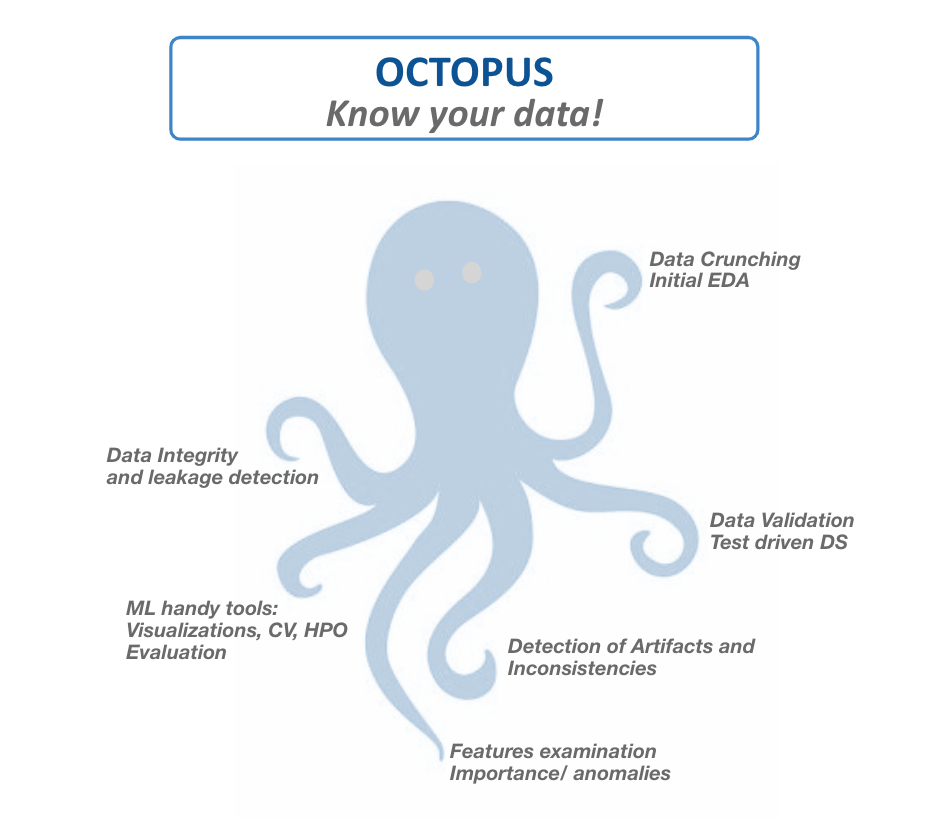

In [15]:
from IPython.display import Image
Image("../images/octopus_know_your_data.PNG", width=600, height=600)

In [16]:
XY_sampled=oc.sampling(XY_df,'Survived',200)

number of positive instances: 342 
number of negative instance :  549
new dataset shape:  (542, 17)
Method Name       : sampling
Current memory usage: 0.078765MB
Peak                : 0.092543MB
Total time taken:   12.273 ms 


# ML template starts - training session 

## Training model (LGBM) with stratisfied CV 

In [17]:
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import pandas as pd
import numpy as np
import lightgbm as lgb
import tracemalloc


def cv_adv(X, y, threshold, iterations, shuffle=True, params=None, mode="classification"):

    # Cross Validation - stratified with and without shuffeling
    arr_f1_weighted = np.array([])
    arr_f1_macro = np.array([])
    arr_f1_positive = np.array([])
    arr_recall = np.array([])
    arr_precision = np.array([])
    prediction_folds = []
    preds_folds = []
    y_folds = []
    stacked_models =[]
    index_column=[]

    if mode=="regression":
        skf = KFold(n_splits=5)
    else:
        skf = StratifiedKFold(n_splits=5, random_state=2, shuffle=shuffle)

    for train_index, test_index in tqdm(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = lgbm(X_train, y_train, X_test, y_test, iterations, params)
        preds = clf.predict(X_test)

        predictions = []
        predictions = adjusted_classes(preds, threshold)
        stacked_models.append(clf)
        index_column.extend(X_test.index.values.tolist())
        #index_column=np.append(index_column,X_test.index.values.astype(int))
    
        """ Multiclass 
        predictions = clf.predict(X_test)
        predictions_classes = []
        for i in predictions:   
            print (np.argmax(i))
            predictions_classes.append(np.argmax(i))  
        """
                               
        if mode=="regression":
            prediction_folds.extend(predictions)
            preds_folds.extend(preds)
            y_folds.extend(y_test) 
            final_clf = lgbm(X, y, X_test, y_test, iterations, params)

        else:
            prediction_folds.extend(predictions)
            preds_folds.extend(preds)
            y_folds.extend(y_test)
            arr_f1_weighted = np.append(
                arr_f1_weighted, f1_score(y_test, predictions, average="weighted")
            )
            arr_f1_macro = np.append(
                arr_f1_macro, f1_score(y_test, predictions, average="macro")
            )
            arr_f1_positive = np.append(
                arr_f1_positive, f1_score(y_test, predictions, average="binary")
            )
            final_clf = lgbm(X, y, X_test, y_test, iterations, params)

    return (
        {'final_clf': final_clf,
        'f1_weighted':arr_f1_weighted,
        'f1_macro':arr_f1_macro,
        'f1_positive': arr_f1_positive,
        'predictions_folds':prediction_folds,
        'predictions_proba': preds_folds,
        'y':y_folds,
        'index':index_column,
        'stacked_models': stacked_models}
    )

def lgbm(X_train, y_train, X_test, y_test, num, params=None):
    # Training function for LGBM with basic categorical features treatment and close to default params

    categorical_features = []
    for c in X_train.columns:
        col_type = X_train[c].dtype
        if col_type == "object" or col_type.name == "category":
            # an option in case the data(pandas dataframe) isn't passed with the categorical column type
            # X[c] = X[c].astype('category')
            categorical_features.append(c)

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
    lgb_valid = lgb.Dataset(X_test, y_test, categorical_feature=categorical_features)

    if params == None:
        params = {
            "objective": "binary",
            "boosting": "gbdt",
            "scale_pos_weight": 0.02,
            "learning_rate": 0.005,
            "seed": 100
            # 'categorical_feature': 'auto',
            # 'metric': 'auc',
            # 'scale_pos_weight':0.1,
            # 'learning_rate': 0.02,
            # 'num_boost_round':2000,
            # "min_sum_hessian_in_leaf":1,
            # 'max_depth' : 100,
            # "bagging_freq": 2,
            # "num_leaves":31,
            # "bagging_fraction" : 0.4,
            # "feature_fraction" : 0.05,
        }

    clf = lgb.train(params, lgb_train, num)

    return clf


def adjusted_classes(y_scores, t):
    # transformation from prediction probabolity to class given the threshold
    return [1 if y >= t else 0 for y in y_scores]



In [37]:
pip install optuna

     |████████████████████████████████| 293 kB 437 kB/s eta 0:00:01
     |████████████████████████████████| 159 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 1.8 MB/s eta 0:00:01
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=7bad0e4840330e495c7fcecfda31c55a267ad4b8a48de0b656fc726115de8840
  Stored in directory: /Users/gershonc/Library/Caches/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.model_selection import cross_val_score
def objective(trial):
  learning_rate = trial.suggest_float('learning_rate',0.01,0.3)
  max_depth = trial.suggest_int('max_depth',3,6)
  loss= trial.suggest_categorical('loss',['lad', 'ls','huber','quantile'])
  regressor = GradientBoostingRegressor(learning_rate=learning_rate,max_depth=max_depth)
  return cross_val_score(
        regressor, X_train, y_train, n_jobs=-1, cv=5,scoring='neg_root_mean_squared_error').mean() 
 

In [47]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20) 

[I 2021-04-12 14:44:17,490] A new study created in memory with name: no-name-61b13e61-4d90-40af-8e80-710ade776e3e
[W 2021-04-12 14:44:17,493] Trial 0 failed because of the following error: NameError("name 'GradientBoostingRegressor' is not defined")
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/optuna/_optimize.py", line 217, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-46-0cb2a86deb2e>", line 6, in objective
    regressor = GradientBoostingRegressor(learning_rate=learning_rate,max_depth=max_depth)
NameError: name 'GradientBoostingRegressor' is not defined


NameError: name 'GradientBoostingRegressor' is not defined

In [18]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'learning_rate': 0.1,
        'n_estimators': 500,
        'verbose': -1,
        'max_depth': -1,
        'seed':100,      
        'min_split_gain': 0.01, 
        'num_leaves': 18, 
        'reg_alpha': 0.01, 
        'reg_lambda': 1.50,
        'feature_fraction':0.2,
        'bagging_fraction':0.84

}
    
metrics= o.cv_adv(X,y,0.5,1000,shuffle=True,params=params)

5it [00:02,  2.23it/s]

Method Name       : cv_adv
Current memory usage: 1.232675MB
Peak                : 3.583766MB
Total time taken:   2265.610 ms 


# Model evaluation 

### Plot of the CV folds - F1 macro and F1 for the positive class 
(in this case it's an unbalanced dataset)

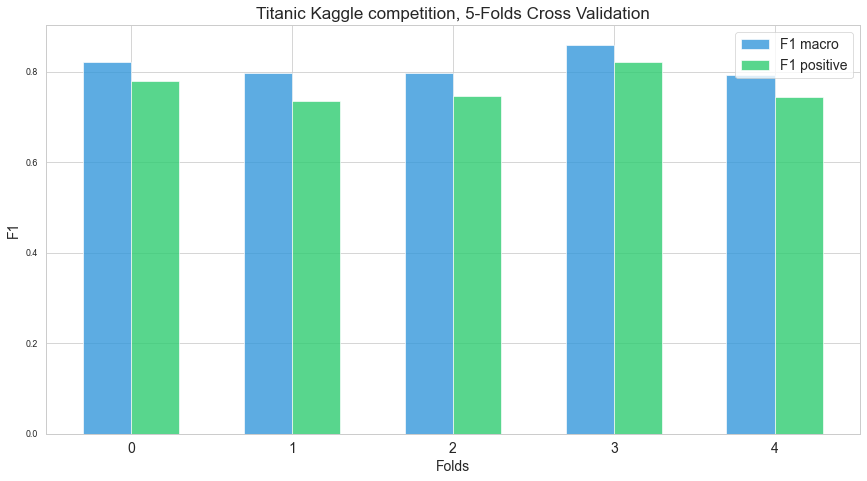

In [19]:
oc.cv_plot(metrics['f1_weighted'],metrics['f1_macro'],metrics['f1_positive'],'Titanic Kaggle competition')

## Scikit learn - Classification report 

In [20]:
print(classification_report(metrics['y'], metrics['predictions_folds']))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.74      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.83      0.82       891



## ROC curve with AUC

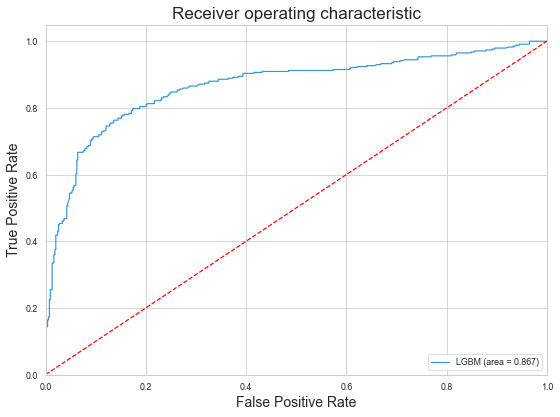

In [22]:
oc.roc_curve_plot(metrics['y'], metrics['predictions_proba'])

## Confusion Matrix plot (normalized and with absolute values) 

<Figure size 432x288 with 0 Axes>

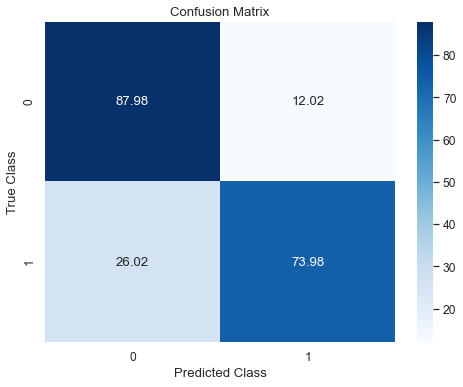

<Figure size 432x288 with 0 Axes>

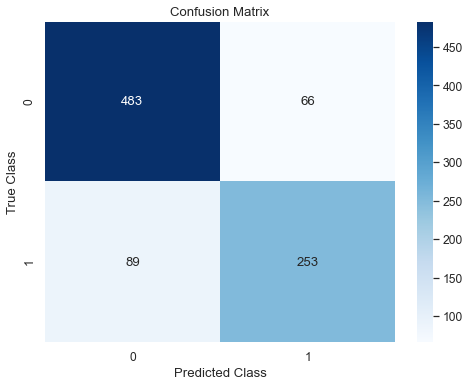

In [23]:
oc.confusion_matrix_plot(metrics['y'], metrics['predictions_folds'])

## Feature Importance plot 

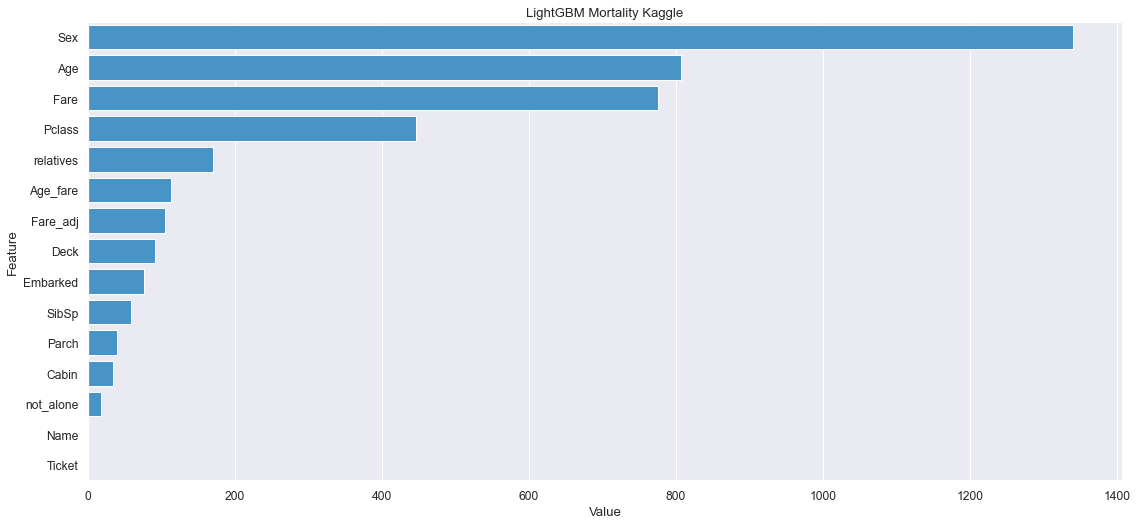

In [24]:
feature_imp_list=oc.plot_imp(metrics['final_clf'],X,'LightGBM Mortality Kaggle',num=15)

In [25]:
top_features=feature_imp_list.sort_values(by='Value', ascending=False).head(20)

In [26]:
top_features

,Value,Feature
2,1339.907813,Sex
3,806.598651,Age
7,774.920723,Fare
0,445.944454,Pclass
11,170.681966,relatives
13,112.524455,Age_fare
14,104.968455,Fare_adj
10,91.498246,Deck
9,76.900251,Embarked
4,59.083087,SibSp


## Correlations analysis (on top features)

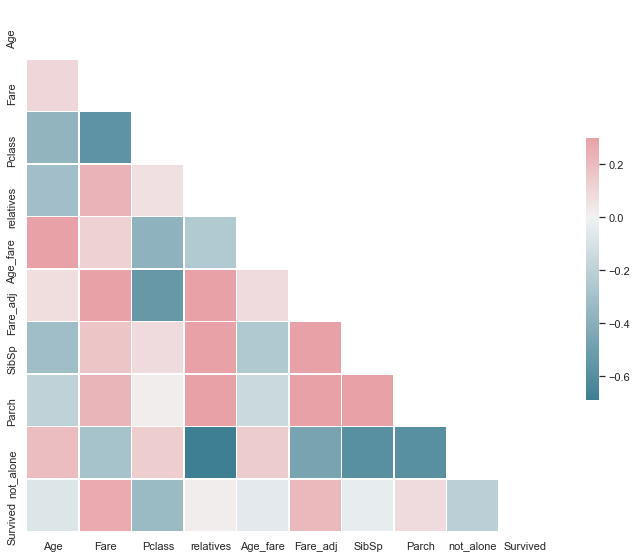

In [27]:
list_for_correlations=top_features['Feature'].to_list()
list_for_correlations.append('Survived')
oc.correlations(XY_df,list_for_correlations)

## Data leakage test 

In [28]:
oc.data_leakage(X,top_features['Feature'].to_list())

->  Passed the data leakage test - no duplicate intstances detected 
Method Name       : data_leakage
Current memory usage: 0.027396MB
Peak                : 0.195517MB
Total time taken:   9.972 ms 


## Analysis of FPs/FNs

In [29]:
fps=oc.recieve_fps(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)
fns=oc.recieve_fns(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)

calculating using threshold of:  0.5
calculating using threshold of:  0.5


In [30]:
fps

,index,label,preds_proba,preds_class
0,297,0,0.982749,1
1,41,0,0.982547,1
2,205,0,0.980167,1
3,772,0,0.978685,1
4,852,0,0.968183,1
5,312,0,0.959073,1
6,782,0,0.958128,1
7,140,0,0.938047,1
8,177,0,0.935753,1
9,854,0,0.919287,1


In [31]:
fns

,index,label,preds_proba,preds_class
0,65,1,0.007480,0
1,709,1,0.007480,0
2,570,1,0.007977,0
3,391,1,0.012577,0
4,444,1,0.013603,0
5,510,1,0.015243,0
6,107,1,0.016109,0
7,127,1,0.019070,0
8,255,1,0.020616,0
9,338,1,0.022364,0


In [32]:
filter_fps  = XY_df[XY_df.index.isin(fps['index'])]
filter_fns  = XY_df[XY_df.index.isin(fns['index'])]
filter_fps_with_prediction=pd.merge(filter_fps,fps[['index','preds_proba']], left_on=[pd.Series(filter_fps.index.values)], right_on=fps['index']) 
filter_fns_with_prediction=pd.merge(filter_fns,fns[['index','preds_proba']], left_on=[pd.Series(filter_fns.index.values)], right_on=fns['index']) 

### Top FPs with full features 

In [33]:
filter_fps_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27.0,1,0,11668,21.0000,nan,S,0.0,1,0,1.0,2.0,41,0.982547
1,140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,nan,C,0.0,2,0,NaN,2.0,140,0.938047
2,177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,3.0,0,1,4.0,2.0,177,0.935753
3,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,7.0,1,0,0.0,1.0,205,0.980167
4,297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,0.0,3.0,297,0.982749
5,312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,nan,S,0.0,2,0,1.0,2.0,312,0.959073
6,772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,5.0,0,1,4.0,1.0,772,0.978685
7,782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S,4.0,0,1,1.0,2.0,782,0.958128
8,852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,nan,C,0.0,2,0,0.0,2.0,852,0.968183
9,854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,nan,S,0.0,1,0,2.0,2.0,854,0.919287


### Top FNs with full features 

In [34]:
filter_fns_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,nan,C,0.0,2,0,NaN,2.0,65,0.007480
1,107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,0.0000,nan,S,0.0,0,1,NaN,NaN,107,0.016109
2,127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,0.0000,nan,S,0.0,0,1,1.0,NaN,127,0.019070
3,255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,nan,C,0.0,2,0,1.0,2.0,255,0.020616
4,338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,nan,S,0.0,0,1,2.0,1.0,338,0.022364
5,391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,0.0000,nan,S,0.0,0,1,1.0,NaN,391,0.012577
6,444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,nan,S,0.0,0,1,NaN,1.0,444,0.013603
7,510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,0.0000,nan,Q,0.0,0,1,1.0,NaN,510,0.015243
8,570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,nan,S,0.0,0,1,4.0,1.0,570,0.007977
9,709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,nan,C,0.0,2,0,NaN,2.0,709,0.007480
